In [1]:
from cql import CQL

/Users/donnybertucci/ClipQuery/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/donnybertucci/ClipQuery/venv/lib/python3.8/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [2]:
import pandas as pd
df = pd.read_parquet("./experiments/dummy.parquet")
df.rename(columns={"clip(image)": "image_encoding"}, inplace=True)

In [3]:
cql = CQL(df)

In [4]:
puppy_springer_spaniels = cql(
    """SELECT *, clip(image_encoding, 'a picture of cute puppy dogs') as puppy_concept FROM df
       WHERE label = 'English Springer Spaniel'
       ORDER BY puppy_concept DESC
       LIMIT 25
    """
)

  0%|          | 0/122 [00:00<?, ?it/s]/Users/donnybertucci/ClipQuery/clip_query.py:87: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  images_encoding = torch.tensor(batch, dtype=torch.float32).to(self.device)
123it [00:00, 369.25it/s]                         


In [5]:
puppy_springer_spaniels.head()

,id,label,split,image_encoding,puppy_concept
0,val/n02102040/n02102040_4972.JPEG,English Springer Spaniel,valid,"[-0.14521825313568115, 0.20355358719825745, 0....",23.395792
1,val/n02102040/n02102040_4872.JPEG,English Springer Spaniel,valid,"[-0.7678520679473877, -0.09080967307090759, -0...",22.475618
2,val/n02102040/n02102040_6240.JPEG,English Springer Spaniel,valid,"[0.20323538780212402, 0.0881328135728836, 0.25...",22.468166
3,val/n02102040/n02102040_2142.JPEG,English Springer Spaniel,valid,"[-0.12490583956241608, 0.31244441866874695, 0....",21.884441
4,val/n02102040/n02102040_371.JPEG,English Springer Spaniel,valid,"[0.2644515633583069, 0.33261045813560486, 0.06...",21.641991


In [7]:
from PIL import Image
import os
def show_image(df, index: int):
    return Image.open(os.path.join("./data/imagenette", df["id"].iloc[index]))

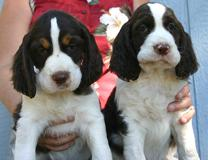

In [8]:
show_image(puppy_springer_spaniels, 0)

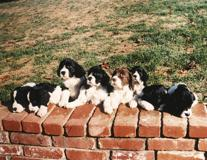

In [9]:
show_image(puppy_springer_spaniels, 1)

In [10]:
buildings_that_are_not_houses = cql(
    """SELECT *,
          clip(image_encoding, 'a picture of a building') as building_concept,
          clip(image_encoding, 'a picture of a house') as house_concept
       FROM df
       WHERE house_concept < 10
	   ORDER BY building_concept DESC
       LIMIT 25
    """
)

123it [00:00, 405.64it/s]                        
123it [00:00, 352.55it/s]                         


In [11]:
buildings_that_are_not_houses.head()

,id,label,split,image_encoding,puppy_concept,building_concept,house_concept
0,val/n03028079/n03028079_17690.JPEG,church,valid,"[0.1872430443763733, 0.2423173189163208, 0.118...",-0.346349,16.434622,8.764348
1,val/n03028079/n03028079_16080.JPEG,church,valid,"[-0.6353689432144165, -0.21825972199440002, -0...",-0.490182,15.640427,8.756687
2,val/n03425413/n03425413_15772.JPEG,gas pump,valid,"[-0.10567209124565125, 0.6856504678726196, 0.0...",0.178444,15.597792,9.759493
3,val/n03028079/n03028079_322.JPEG,church,valid,"[-0.3063763380050659, 0.40126049518585205, 0.3...",1.501684,15.382891,9.798800
4,val/n03028079/n03028079_77811.JPEG,church,valid,"[0.380256712436676, -0.2101154327392578, 0.022...",2.783605,14.970798,9.147715


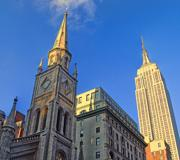

In [12]:
show_image(buildings_that_are_not_houses, 0)

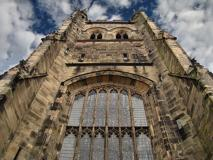

In [13]:
show_image(buildings_that_are_not_houses, 1)

In [14]:
buildings_that_are_houses = cql(
    """SELECT *,
          clip(image_encoding, 'a picture of a building') as building_concept,
          clip(image_encoding, 'a picture of a house') as house_concept
       FROM df
       WHERE house_concept > 20
	   ORDER BY building_concept DESC
       LIMIT 25
    """
)

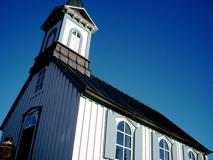

In [15]:
show_image(buildings_that_are_houses, 0)

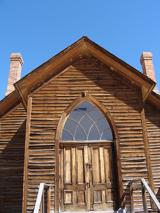

In [16]:
show_image(buildings_that_are_houses, 1)